<a href="https://colab.research.google.com/github/decile-team/submodlib/blob/master/tutorials/Modelling_Capabilities_of_SMI_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [ ]:
!pip install -i https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ submodlib

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
     |████████████████████████████████| 79 kB 2.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for submodlib: filename=submodlib-1.1.2-cp37-cp37m-linux_x86_64.whl size=491418 sha256=e5c326ffa4878fafa491cc6cfe1cd11a81a2243b3433d9a07b5cd352964a79f4
  Stored in directory: /root/.cache/pip/wheels/51/db/2f/0d54fe93a7db2761f759121f23afe30dd9511994695fba8c4e
Successfully built submodlib


# Hand-crafted Data with Queries

To carefully observe the characteristics of the optimal set obtained by the maximization of these functions, we begin by creating a controlled dataset of 46 2D points along with some query points as below. Specifically we have some clusters and some outliers in this dataset. Please note that there is no overlap between the ground set and the query set.

Number of elements in ground set =  46


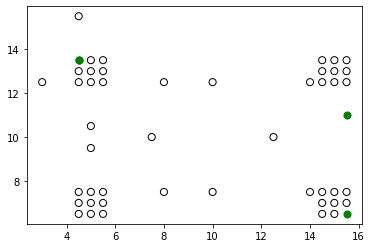

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
groundData =np.array( [(3,12.5), (5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), (7.5,10), (12.5,10), (10,12.5), 
(10,7.5), (8,12.5), (8,7.5), (14,12.5), (14,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )
print("Number of elements in ground set = ", len(groundData))
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]

mutlipleQueryData = np.array([(4.5,13.5), (15.5,6.5)])
multiplequeryxs = [x[0] for x in mutlipleQueryData]
multiplequeryys = [x[1] for x in mutlipleQueryData]

mutlipleQueryData2 = np.array([(4.5,13.5), (15.5,11)])
multiplequeryxs2 = [x[0] for x in mutlipleQueryData2]
multiplequeryys2 = [x[1] for x in mutlipleQueryData2]

singleQueryData = np.array([(4.5,13.5)])
singlequeryxs = [x[0] for x in singleQueryData]
singlequeryys = [x[1] for x in singleQueryData]

plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")

In [ ]:
def printGreedyRounded(greedyList):
  print([(elem[0], round(elem[1],3)) for elem in greedyList])

# Selection by FacilityLocationMutualInformation Function (FL1MI)

## Single Query

[(45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0), (36, 0.0)]
[(43, 2.114), (45, 0.0), (44, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0), (36, 0.0)]
[(12, 4.228), (45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0)]
[(7, 6.909), (43, 0.088), (12, 0.049), (45, 0.0), (44, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0)]
[(7, 8.37), (6, 0.403), (1, 0.368), (43, 0.158), (12, 0.156), (0, 0.096), (2, 0.089), (13, 0.022), (8, 0.022), (45, 0.0)]
[(7, 8.402), (13, 0.7), (2, 0.42), (0, 0.363), (43, 0.335), (8, 0.251), (12, 0.223), (6, 0.221), (1, 0.221), (14, 0.134)]
[(7, 8.402), (45, 0.769), (0, 0.536), (43, 0.53), (8, 0.479), (13, 0.298), (14, 0.231), (2, 0.221), (12, 0.221), (6, 0.221)]
[(7, 8.402), (44, 1.117), (43, 0.677), (0, 0.643), (8, 0.479), (13, 0.298), (39, 0.259), (14, 0.221), (12, 0.221), (6, 0.221)]
[(7, 8.402), (45, 1.433), (43, 0.721), (0, 0.643), 

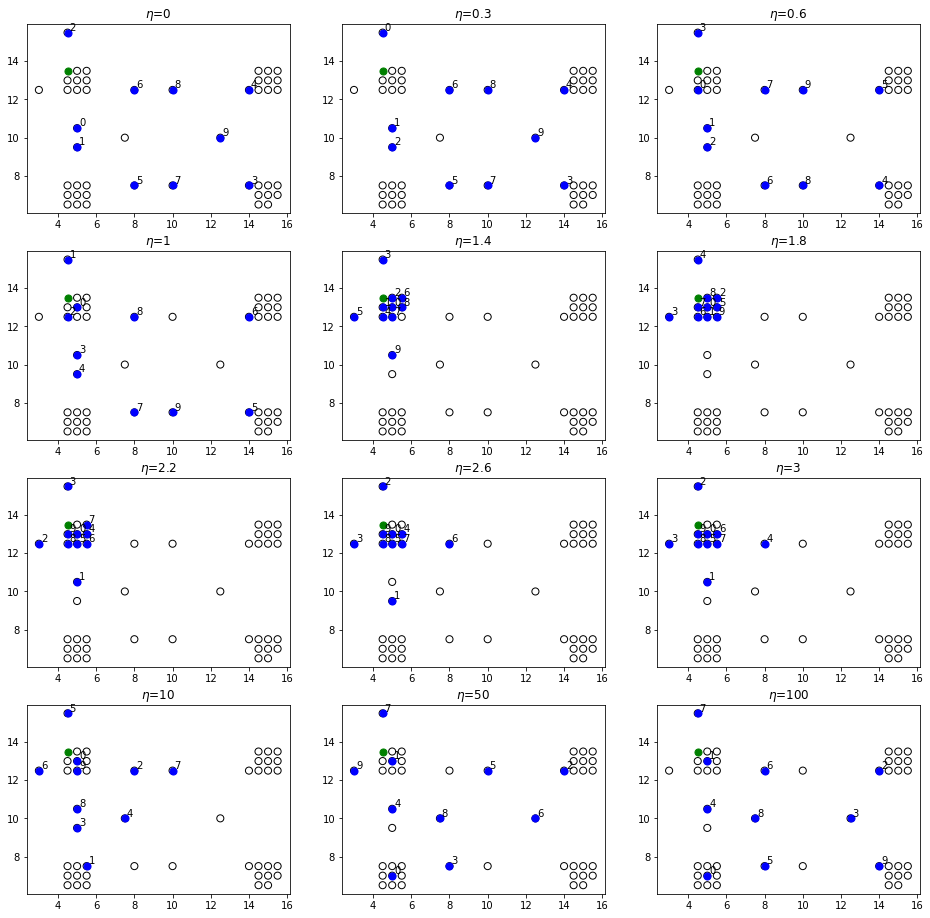

In [ ]:
from submodlib import FacilityLocationMutualInformationFunction
etas = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = FacilityLocationMutualInformationFunction(n=46, num_queries=1, data=groundData, 
                                                    queryData=singleQueryData, metric="euclidean", 
                                                    magnificationEta=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Queries (1)

[(45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0), (36, 0.0)]
[(14, 2.257), (42, 1.647), (45, 0.0), (44, 0.0), (43, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0)]
[(8, 4.345), (34, 3.462), (45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0)]
[(7, 6.947), (28, 5.928), (43, 0.088), (12, 0.049), (45, 0.0), (44, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0)]
[(7, 8.371), (28, 7.353), (6, 0.403), (1, 0.368), (29, 0.299), (34, 0.298), (43, 0.158), (12, 0.156), (23, 0.108), (0, 0.096)]
[(7, 8.402), (28, 7.387), (13, 0.69), (22, 0.585), (27, 0.415), (2, 0.4), (0, 0.363), (43, 0.335), (8, 0.245), (23, 0.223)]
[(7, 8.402), (28, 7.387), (45, 0.733), (21, 0.731), (0, 0.536), (43, 0.53), (8, 0.458), (23, 0.307), (34, 0.298), (13, 0.298)]
[(7, 8.402), (28, 7.387), (45, 1.066), (36, 0.787), (43, 0.677), (0, 0.643), (42, 0.505), (8, 0.435), (34, 0.298), (29, 0.298)]
[(7, 8.402), (28, 7.387), (45, 1.38)

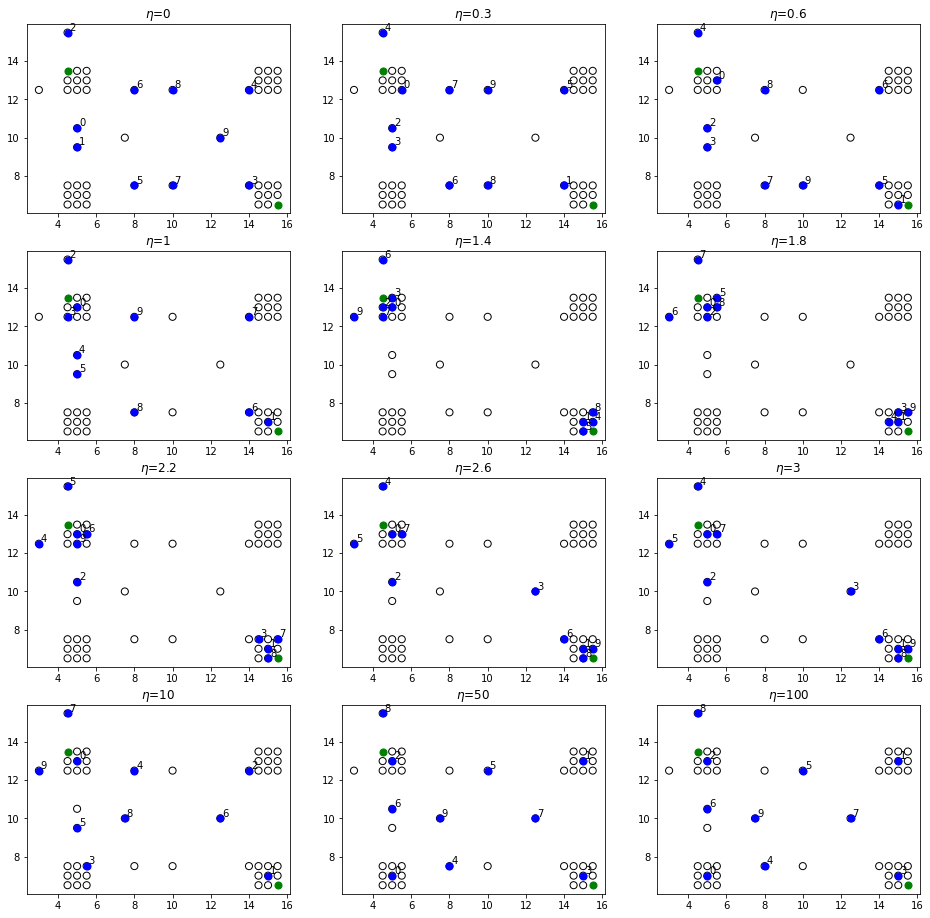

In [ ]:
from submodlib import FacilityLocationMutualInformationFunction
etas = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = FacilityLocationMutualInformationFunction(n=46, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData, metric="euclidean", magnificationEta=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Queries (2)

[(45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0), (36, 0.0)]
[(39, 2.448), (41, 1.002), (43, 0.149), (45, 0.0), (44, 0.0), (42, 0.0), (40, 0.0), (38, 0.0), (37, 0.0), (36, 0.0)]
[(8, 4.339), (16, 2.716), (42, 0.141), (45, 0.0), (44, 0.0), (43, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0)]
[(7, 6.947), (15, 4.257), (42, 0.653), (43, 0.088), (12, 0.049), (45, 0.0), (44, 0.0), (41, 0.0), (40, 0.0), (39, 0.0)]
[(7, 8.371), (16, 5.646), (42, 1.232), (6, 0.403), (1, 0.368), (43, 0.158), (12, 0.156), (0, 0.096), (2, 0.082), (36, 0.055)]
[(7, 8.402), (16, 6.981), (42, 1.756), (13, 0.683), (2, 0.4), (0, 0.363), (43, 0.335), (8, 0.245), (12, 0.223), (6, 0.221)]
[(7, 8.402), (16, 7.763), (42, 2.273), (45, 0.727), (0, 0.536), (43, 0.53), (8, 0.457), (17, 0.333), (13, 0.298), (15, 0.289)]
[(7, 8.402), (10, 7.844), (42, 2.959), (45, 1.06), (43, 0.677), (0, 0.643), (15, 0.529), (8, 0.435), (36, 0.356), (17, 0.298)]
[(7, 8.402), (10, 7.994), (21, 3

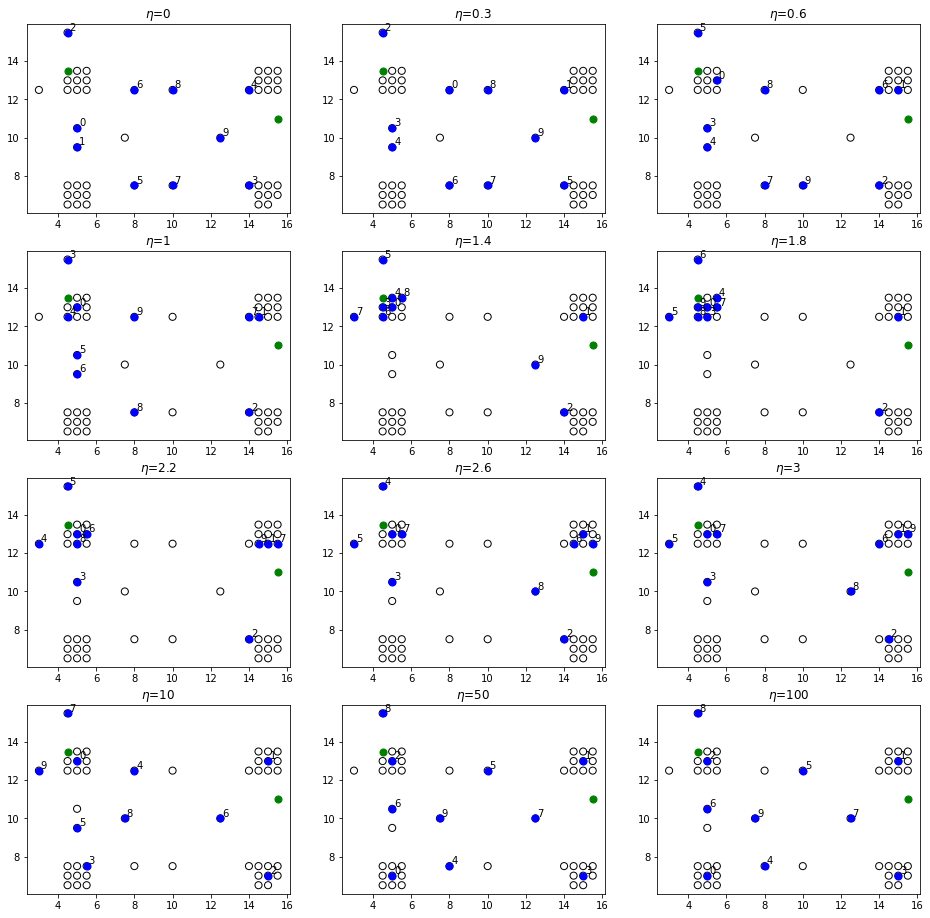

In [ ]:
from submodlib import FacilityLocationMutualInformationFunction
etas = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = FacilityLocationMutualInformationFunction(n=46, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData2, metric="euclidean", magnificationEta=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

# Selection by FacilityLocationVariantMutualInformation Function (FL2MI)

## Single Query

[(6, 0.779), (45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0)]
[(6, 1.09), (1, 0.312), (7, 0.281), (12, 0.243), (2, 0.243), (13, 0.229), (8, 0.229), (14, 0.197), (0, 0.162), (43, 0.147)]
[(6, 1.402), (1, 0.623), (7, 0.562), (12, 0.485), (2, 0.485), (13, 0.457), (8, 0.457), (14, 0.394), (0, 0.325), (43, 0.294)]
[(6, 1.558), (1, 0.779), (7, 0.702), (12, 0.607), (2, 0.607), (13, 0.572), (8, 0.572), (14, 0.493), (0, 0.406), (43, 0.368)]
[(6, 1.869), (1, 1.09), (7, 0.983), (12, 0.849), (2, 0.849), (13, 0.8), (8, 0.8), (14, 0.69), (0, 0.568), (43, 0.515)]
[(6, 2.181), (1, 1.402), (7, 1.264), (12, 1.092), (2, 1.092), (13, 1.029), (8, 1.029), (14, 0.888), (0, 0.731), (43, 0.662)]
[(6, 2.492), (1, 1.713), (7, 1.545), (12, 1.334), (2, 1.334), (13, 1.258), (8, 1.258), (14, 1.085), (0, 0.893), (43, 0.809)]
[(6, 2.804), (1, 2.025), (7, 1.826), (12, 1.577), (2, 1.577), (13, 1.487), (8, 1.487), (14, 1.282), (0, 1.056), (43, 0.956)]
[(6, 3.115), (1, 2.3

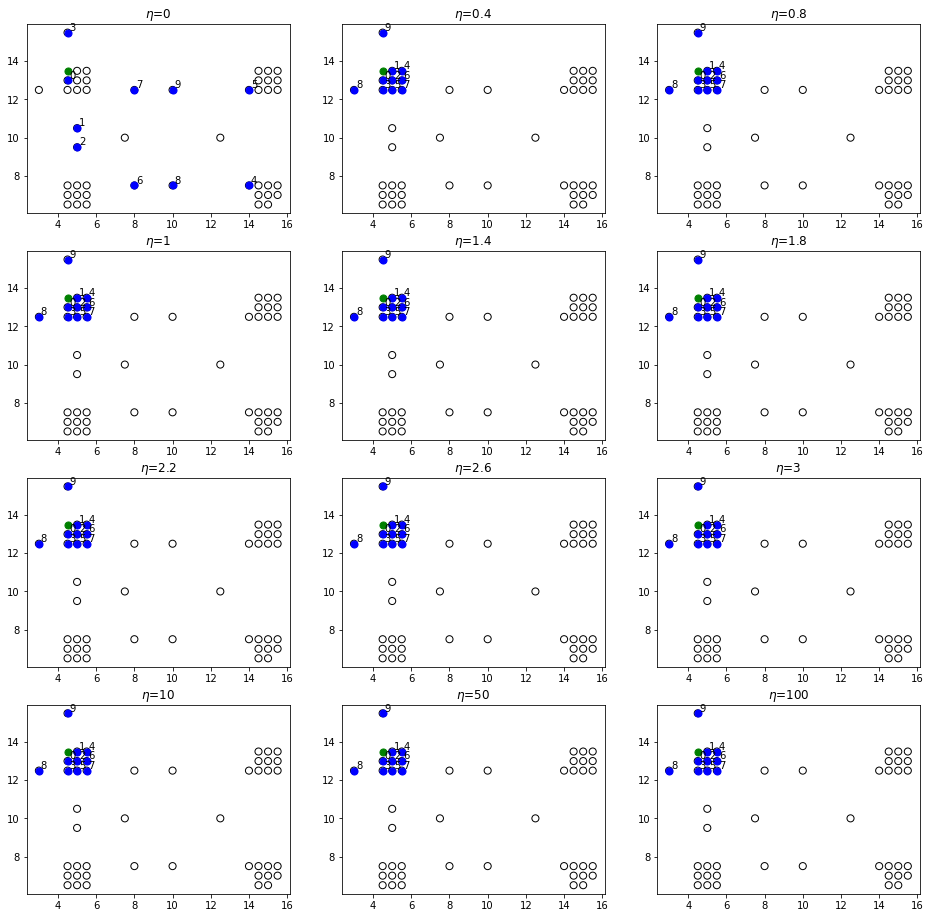

In [ ]:
from submodlib import FacilityLocationVariantMutualInformationFunction
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = FacilityLocationVariantMutualInformationFunction(n=46, num_queries=1, data=groundData, 
                                                    queryData=singleQueryData, metric="euclidean", queryDiversityEta=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Queries (1)

[(34, 0.781), (6, 0.777), (45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0)]
[(34, 1.092), (6, 1.089), (29, 0.312), (1, 0.312), (28, 0.281), (7, 0.281), (33, 0.243), (23, 0.243), (12, 0.243), (2, 0.243)]
[(34, 1.404), (6, 1.4), (29, 0.623), (1, 0.623), (28, 0.562), (7, 0.562), (33, 0.485), (23, 0.485), (12, 0.485), (2, 0.485)]
[(34, 1.559), (6, 1.556), (29, 0.779), (1, 0.779), (28, 0.702), (7, 0.702), (33, 0.607), (23, 0.607), (12, 0.607), (2, 0.607)]
[(34, 1.871), (6, 1.867), (29, 1.09), (1, 1.09), (28, 0.983), (7, 0.983), (33, 0.849), (23, 0.849), (12, 0.849), (2, 0.849)]
[(34, 2.182), (6, 2.179), (29, 1.402), (1, 1.402), (28, 1.264), (7, 1.264), (33, 1.092), (23, 1.092), (12, 1.092), (2, 1.092)]
[(34, 2.494), (6, 2.49), (29, 1.713), (1, 1.713), (28, 1.545), (7, 1.545), (33, 1.334), (23, 1.334), (12, 1.334), (2, 1.334)]
[(34, 2.806), (6, 2.802), (29, 2.025), (1, 2.025), (28, 1.826), (7, 1.826), (33, 1.577), (23, 1.577), (12, 1.577), (2, 1.577)]
[(

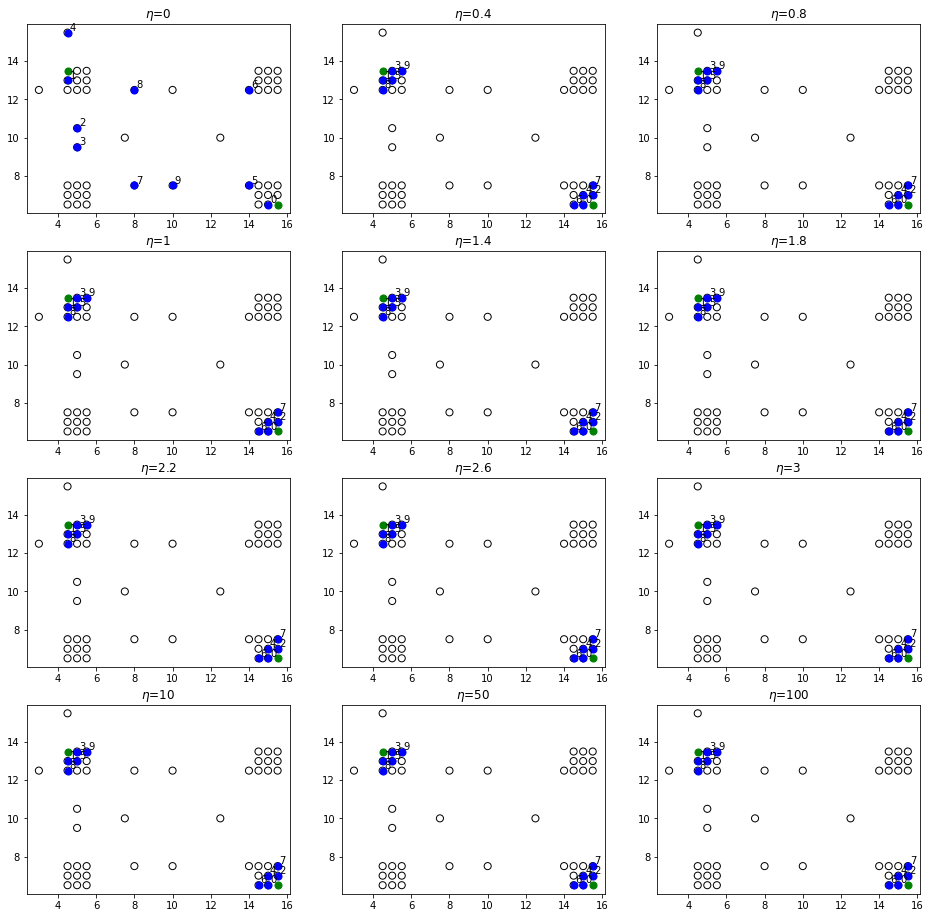

In [ ]:
from submodlib import FacilityLocationVariantMutualInformationFunction
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = FacilityLocationVariantMutualInformationFunction(n=46, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData, metric="euclidean", queryDiversityEta=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Queries (2)

[(1, 0.783), (17, 0.468), (45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0)]
[(1, 1.095), (17, 0.657), (6, 0.312), (7, 0.281), (12, 0.243), (2, 0.243), (13, 0.229), (8, 0.229), (14, 0.197), (16, 0.181)]
[(1, 1.406), (17, 0.846), (6, 0.623), (7, 0.562), (12, 0.485), (2, 0.485), (13, 0.457), (8, 0.457), (14, 0.394), (16, 0.363)]
[(1, 1.562), (17, 0.94), (6, 0.779), (7, 0.702), (12, 0.607), (2, 0.607), (13, 0.572), (8, 0.572), (14, 0.493), (16, 0.454)]
[(1, 1.874), (17, 1.129), (6, 1.09), (7, 0.983), (12, 0.849), (2, 0.849), (13, 0.8), (8, 0.8), (14, 0.69), (16, 0.635)]
[(1, 2.185), (6, 1.402), (17, 1.318), (7, 1.264), (12, 1.092), (2, 1.092), (13, 1.029), (8, 1.029), (14, 0.888), (16, 0.816)]
[(1, 2.497), (6, 1.713), (7, 1.545), (17, 1.507), (12, 1.334), (2, 1.334), (13, 1.258), (8, 1.258), (14, 1.085), (16, 0.998)]
[(1, 2.808), (6, 2.025), (7, 1.826), (17, 1.696), (12, 1.577), (2, 1.577), (13, 1.487), (8, 1.487), (14, 1.282), (16, 1.179)]
[(1, 3.12),

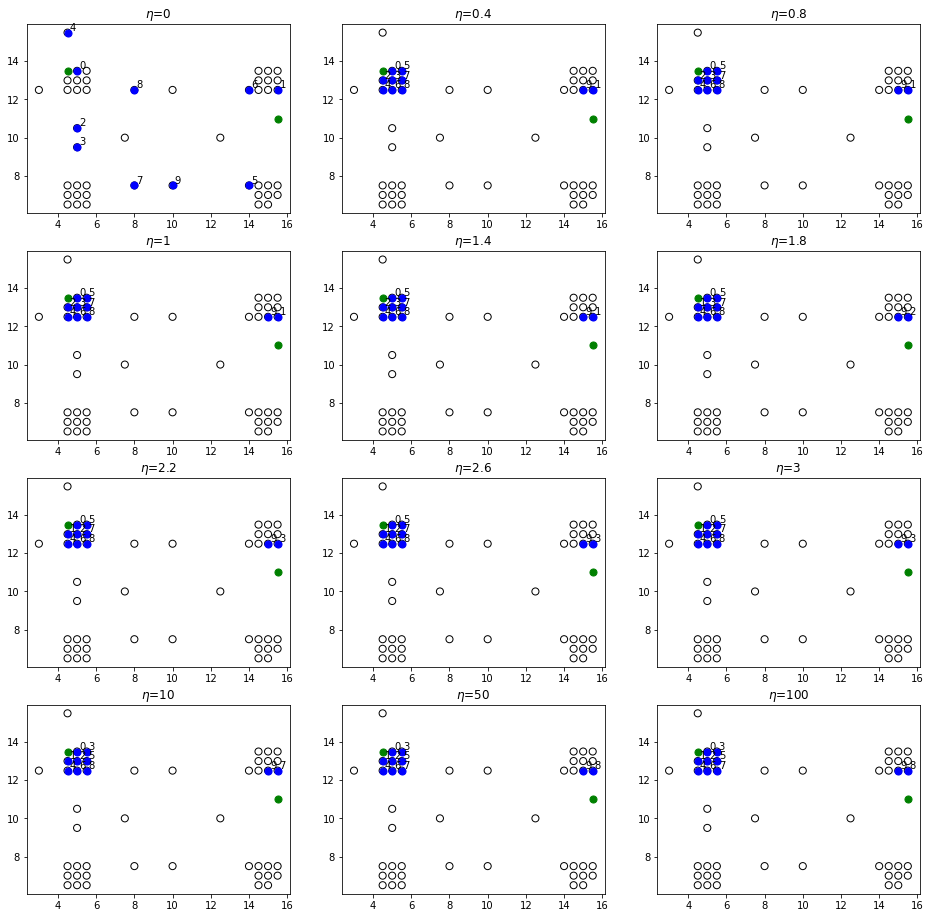

In [ ]:
from submodlib import FacilityLocationVariantMutualInformationFunction
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = FacilityLocationVariantMutualInformationFunction(n=46, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData2, 
                                                    metric="euclidean", queryDiversityEta=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

# Selection by ConcaveOverModular Function (COM) Logarithmic

## Single Query

[(6, 0.576), (1, 0.363), (7, 0.243), (12, 0.171), (2, 0.146), (13, 0.12), (8, 0.107), (14, 0.084), (0, 0.064), (43, 0.055)]
[(6, 0.806), (1, 0.594), (7, 0.455), (12, 0.36), (2, 0.335), (13, 0.301), (8, 0.288), (14, 0.244), (0, 0.201), (43, 0.18)]
[(6, 1.037), (1, 0.824), (7, 0.668), (12, 0.55), (2, 0.525), (13, 0.482), (8, 0.469), (14, 0.405), (0, 0.337), (43, 0.306)]
[(6, 1.152), (1, 0.939), (7, 0.775), (12, 0.645), (2, 0.62), (13, 0.572), (8, 0.56), (14, 0.485), (0, 0.405), (43, 0.368)]
[(6, 1.382), (1, 1.169), (7, 0.987), (12, 0.834), (2, 0.809), (13, 0.753), (8, 0.74), (14, 0.645), (0, 0.541), (43, 0.493)]
[(6, 1.613), (1, 1.4), (7, 1.2), (12, 1.024), (2, 0.999), (13, 0.934), (8, 0.921), (14, 0.806), (0, 0.678), (43, 0.619)]
[(6, 1.843), (1, 1.63), (7, 1.413), (12, 1.214), (2, 1.189), (13, 1.115), (8, 1.102), (14, 0.966), (0, 0.814), (43, 0.744)]
[(6, 2.073), (1, 1.861), (7, 1.626), (12, 1.403), (2, 1.378), (13, 1.296), (8, 1.283), (14, 1.126), (0, 0.95), (43, 0.869)]
[(6, 2.304), 

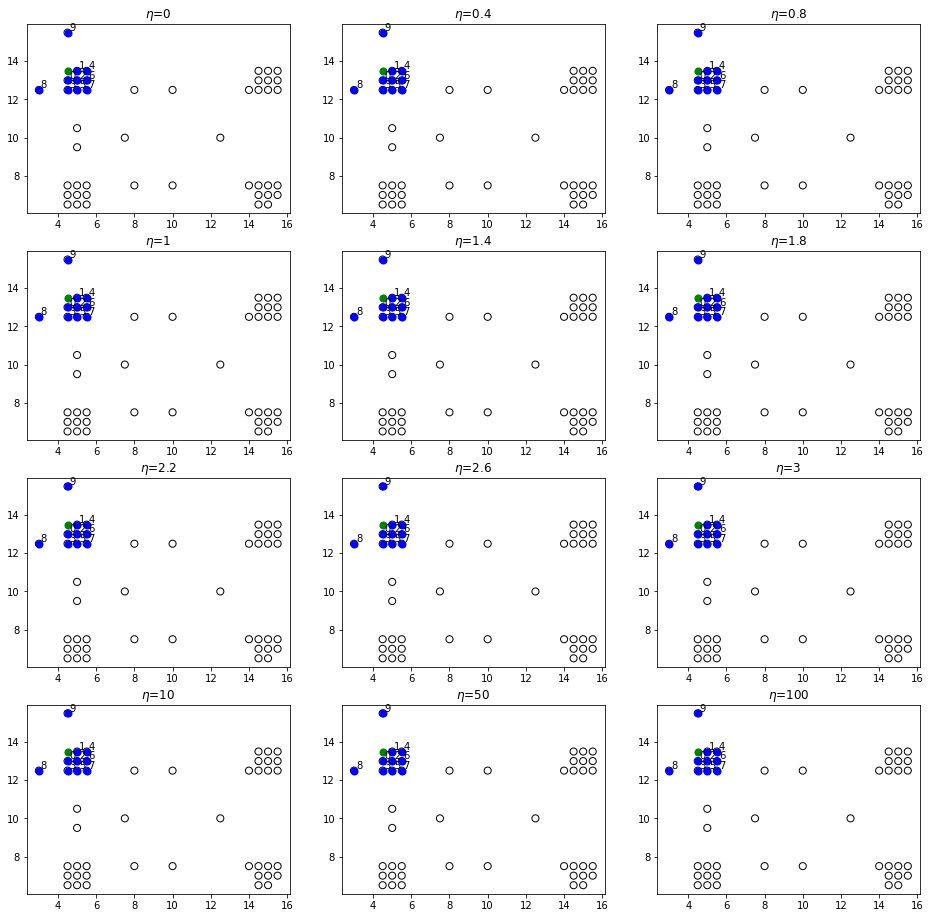

In [ ]:
from submodlib import ConcaveOverModularFunction
from submodlib_cpp import ConcaveOverModular
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = ConcaveOverModularFunction(n=46, num_queries=1, data=groundData, 
                                                    queryData=singleQueryData, 
                                     metric="euclidean", queryDiversityEta=eta, mode=ConcaveOverModular.logarithmic)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Queries (1)

[(34, 0.578), (1, 0.576), (29, 0.364), (6, 0.363), (28, 0.243), (7, 0.243), (33, 0.171), (2, 0.171), (23, 0.146), (12, 0.146)]
[(34, 0.809), (1, 0.807), (29, 0.595), (6, 0.594), (28, 0.456), (7, 0.456), (33, 0.361), (2, 0.361), (23, 0.336), (12, 0.336)]
[(34, 1.039), (1, 1.038), (29, 0.825), (6, 0.825), (28, 0.67), (7, 0.669), (33, 0.551), (2, 0.551), (23, 0.526), (12, 0.526)]
[(34, 1.155), (1, 1.153), (29, 0.941), (6, 0.94), (28, 0.776), (7, 0.776), (33, 0.647), (2, 0.646), (23, 0.621), (12, 0.621)]
[(34, 1.386), (1, 1.384), (29, 1.171), (6, 1.171), (28, 0.99), (7, 0.989), (33, 0.837), (2, 0.836), (23, 0.811), (12, 0.811)]
[(34, 1.616), (1, 1.615), (29, 1.402), (6, 1.402), (28, 1.203), (7, 1.202), (33, 1.027), (2, 1.027), (23, 1.001), (12, 1.001)]
[(34, 1.847), (1, 1.845), (29, 1.633), (6, 1.632), (28, 1.416), (7, 1.416), (33, 1.217), (2, 1.217), (23, 1.192), (12, 1.191)]
[(34, 2.078), (1, 2.076), (29, 1.864), (6, 1.863), (28, 1.629), (7, 1.629), (33, 1.407), (2, 1.407), (23, 1.382), 

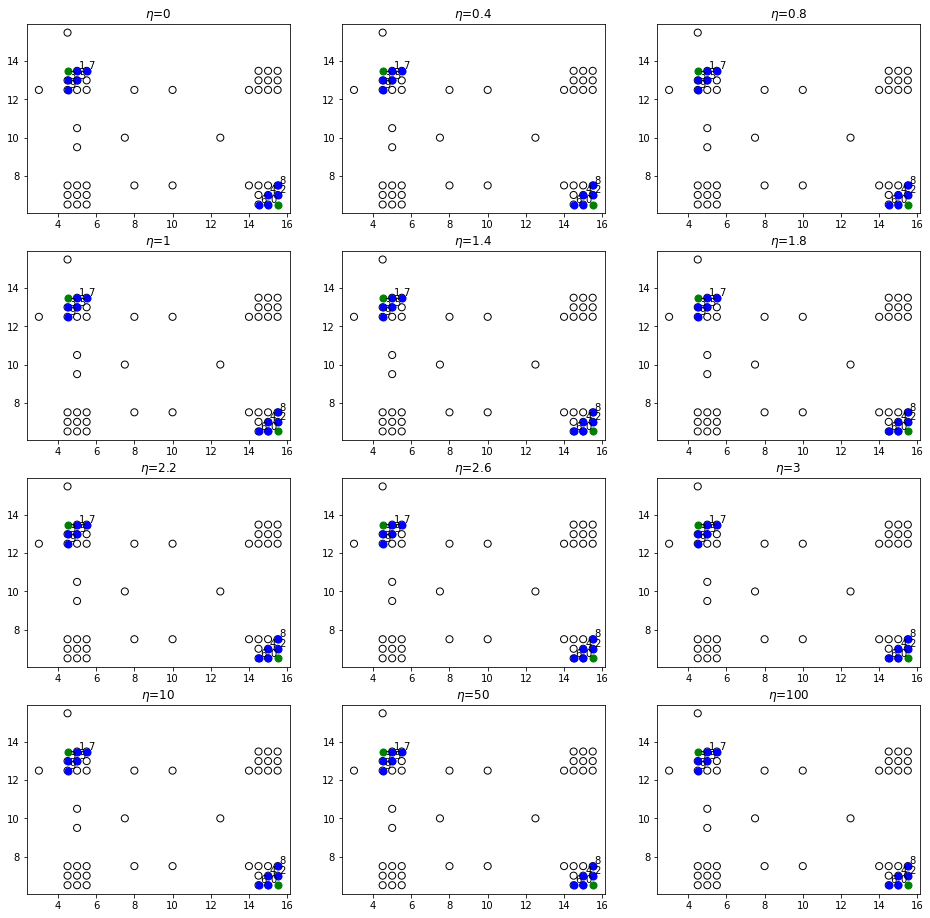

In [ ]:
from submodlib import ConcaveOverModularFunction
from submodlib_cpp import ConcaveOverModular
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = ConcaveOverModularFunction(n=46, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData, 
                                     metric="euclidean", queryDiversityEta=eta, mode=ConcaveOverModular.logarithmic)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Queries (2)

[(1, 0.58), (17, 0.388), (6, 0.365), (16, 0.269), (7, 0.244), (15, 0.192), (2, 0.172), (12, 0.147), (11, 0.146), (10, 0.124)]
[(1, 0.812), (6, 0.598), (17, 0.542), (7, 0.459), (16, 0.419), (2, 0.364), (12, 0.338), (15, 0.329), (8, 0.305), (13, 0.291)]
[(1, 1.043), (6, 0.829), (17, 0.697), (7, 0.673), (16, 0.57), (2, 0.555), (12, 0.529), (8, 0.488), (13, 0.474), (15, 0.466)]
[(1, 1.159), (6, 0.945), (7, 0.782), (17, 0.774), (2, 0.652), (16, 0.644), (12, 0.624), (8, 0.579), (13, 0.565), (15, 0.535)]
[(1, 1.39), (6, 1.176), (7, 0.996), (17, 0.929), (2, 0.843), (12, 0.815), (16, 0.795), (8, 0.762), (13, 0.747), (15, 0.673)]
[(1, 1.622), (6, 1.407), (7, 1.21), (17, 1.085), (2, 1.034), (12, 1.006), (16, 0.946), (8, 0.944), (13, 0.929), (14, 0.816)]
[(1, 1.853), (6, 1.639), (7, 1.424), (17, 1.241), (2, 1.225), (12, 1.196), (8, 1.128), (13, 1.112), (16, 1.095), (14, 0.978)]
[(1, 2.085), (6, 1.87), (7, 1.638), (2, 1.418), (17, 1.395), (12, 1.387), (8, 1.31), (13, 1.295), (16, 1.246), (14, 1.141

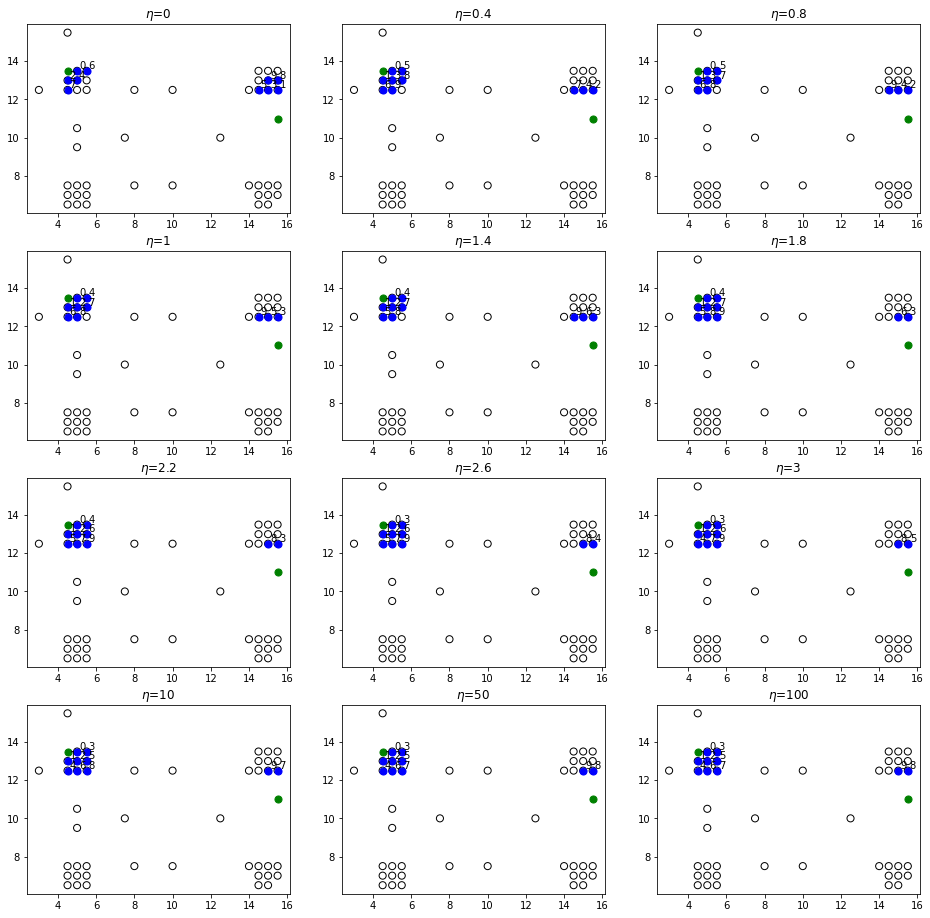

In [ ]:
from submodlib import ConcaveOverModularFunction
from submodlib_cpp import ConcaveOverModular
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = ConcaveOverModularFunction(n=46, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData2, 
                                     metric="euclidean", queryDiversityEta=eta, mode=ConcaveOverModular.logarithmic)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

# Selection by GraphCutMutualInformation Function (GCMI)

## Single Query

[(6, 0.779), (1, 0.779), (7, 0.702), (12, 0.607), (2, 0.607), (13, 0.572), (8, 0.572), (14, 0.493), (0, 0.406), (43, 0.368)]


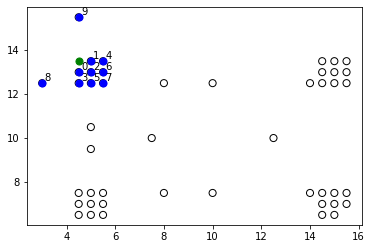

In [ ]:
from submodlib import GraphCutMutualInformationFunction
obj = GraphCutMutualInformationFunction(n=46, num_queries=1, data=groundData, 
                                        queryData=singleQueryData, 
                                        metric="euclidean")
greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
printGreedyRounded(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

## Multiple Queries (1)

[(34, 0.781), (1, 0.781), (29, 0.78), (6, 0.78), (28, 0.704), (7, 0.704), (33, 0.609), (2, 0.609), (23, 0.608), (12, 0.608)]


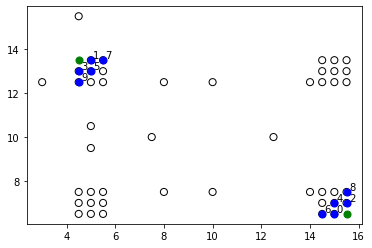

In [ ]:
from submodlib import GraphCutMutualInformationFunction
obj = GraphCutMutualInformationFunction(n=46, num_queries=2, data=groundData, 
                                        queryData=mutlipleQueryData, 
                                        metric="euclidean")
greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
printGreedyRounded(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

## Multiple Queries (2)

[(1, 0.783), (6, 0.783), (7, 0.707), (2, 0.612), (12, 0.61), (8, 0.578), (13, 0.577), (14, 0.499), (17, 0.476), (16, 0.459)]


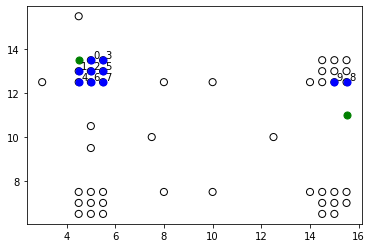

In [ ]:
from submodlib import GraphCutMutualInformationFunction
obj = GraphCutMutualInformationFunction(n=46, num_queries=2, data=groundData, 
                                        queryData=mutlipleQueryData2, 
                                        metric="euclidean")
greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
printGreedyRounded(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))


# Selection by LogDeterminantMutualInformation Function (LogDetMI)

## Single Query

[(45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0), (36, 0.0)]
[(6, 0.014), (1, 0.007), (7, 0.002), (12, 0.001), (2, 0.001), (43, 0.001), (0, 0.0), (8, 0.0), (13, 0.0), (14, 0.0)]
[(6, 0.056), (1, 0.028), (7, 0.008), (12, 0.003), (2, 0.003), (43, 0.002), (0, 0.002), (8, 0.001), (13, 0.0), (14, 0.0)]
[(6, 0.164), (1, 0.09), (7, 0.027), (12, 0.012), (2, 0.01), (43, 0.008), (0, 0.006), (8, 0.002), (13, 0.002), (14, 0.0)]
[(6, 0.353), (1, 0.227), (7, 0.075), (12, 0.033), (2, 0.03), (43, 0.024), (0, 0.018), (8, 0.007), (13, 0.005), (14, 0.001)]
[(6, 0.676), (1, 0.623), (7, 0.282), (2, 0.148), (12, 0.149), (43, 0.131), (0, 0.109), (8, 0.048), (13, 0.035), (14, 0.005)]
[(6, 1.324), (7, 1.917), (14, 2.344), (45, 1.36), (44, 0.378), (37, 0.566), (35, 0.34), (18, 0.063), (24, 0.01), (3, 0.006)]
[(7, 1.791), (0, 1.745), (45, 0.666), (39, 0.948), (44, 0.209), (35, 0.149), (37, 0.079), (18, 0.006), (19, 0.001), (3, 0.001)]
[(12, 1.759), (0, 3.101), (4

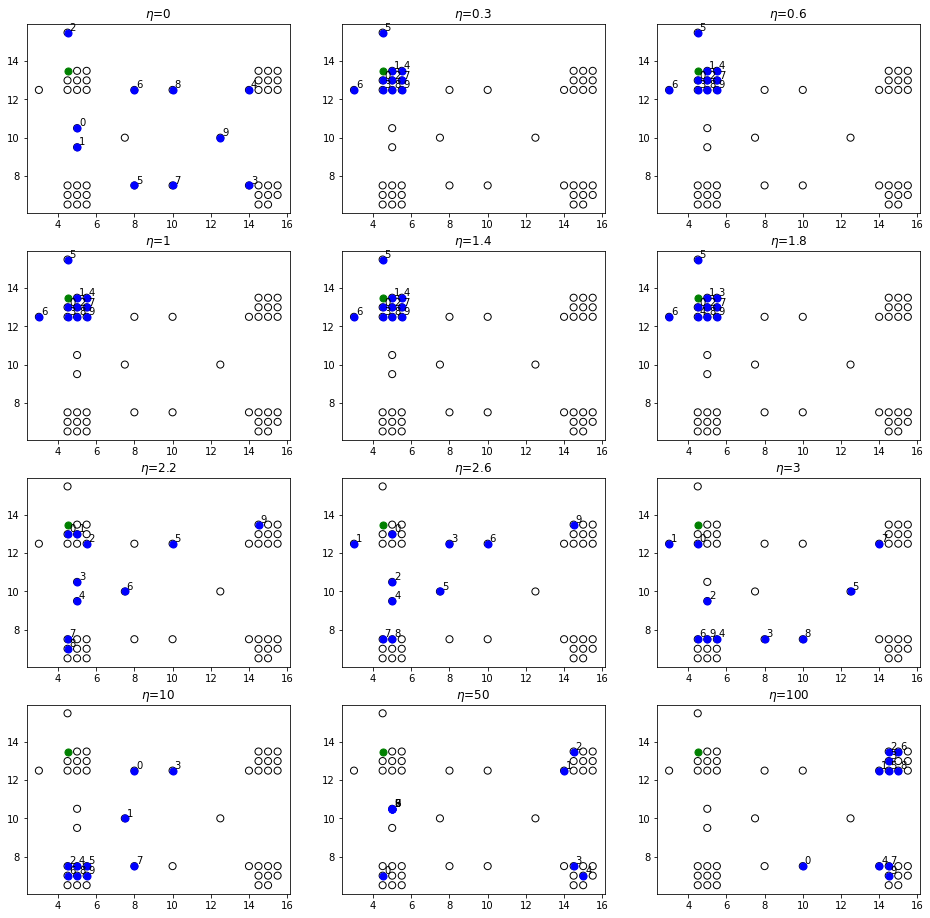

In [ ]:
from submodlib import LogDeterminantMutualInformationFunction
etas = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3, 10, 50, 100]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(4,3,row*3+index)
    obj = LogDeterminantMutualInformationFunction(n=46, num_queries=1, data=groundData, 
                                                    queryData=singleQueryData, metric="euclidean", 
                                                    magnificationEta=eta, lambdaVal=1)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Queries (1)

[(45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0), (36, 0.0)]
[(34, 0.014), (6, 0.014), (29, 0.007), (1, 0.007), (7, 0.002), (28, 0.002), (23, 0.001), (12, 0.001), (33, 0.001), (2, 0.001)]
[(34, 0.056), (6, 0.056), (29, 0.028), (1, 0.028), (7, 0.008), (28, 0.008), (23, 0.003), (12, 0.003), (33, 0.003), (2, 0.003)]
[(34, 0.164), (6, 0.164), (29, 0.09), (1, 0.09), (7, 0.027), (28, 0.027), (23, 0.012), (12, 0.012), (33, 0.01), (2, 0.01)]
[(34, 0.353), (1, 0.353), (29, 0.227), (6, 0.227), (28, 0.075), (7, 0.075), (2, 0.033), (23, 0.033), (12, 0.03), (33, 0.03)]
[(1, 0.676), (34, 0.676), (29, 0.623), (6, 0.623), (7, 0.282), (28, 0.282), (2, 0.148), (12, 0.149), (33, 0.148), (23, 0.149)]
[(34, 1.324), (28, 1.917), (21, 2.346), (1, 1.329), (7, 1.96), (14, 3.045), (39, 1.416), (35, 1.414), (10, 3.589), (-1, -1.7976931348623157e+308)]
[(28, 1.792), (7, 1.792), (0, 1.747), (21, 1.22), (42, 1.033), (45, 0.697), (39, 1.067), (44, 0.26), (35, 0.203),

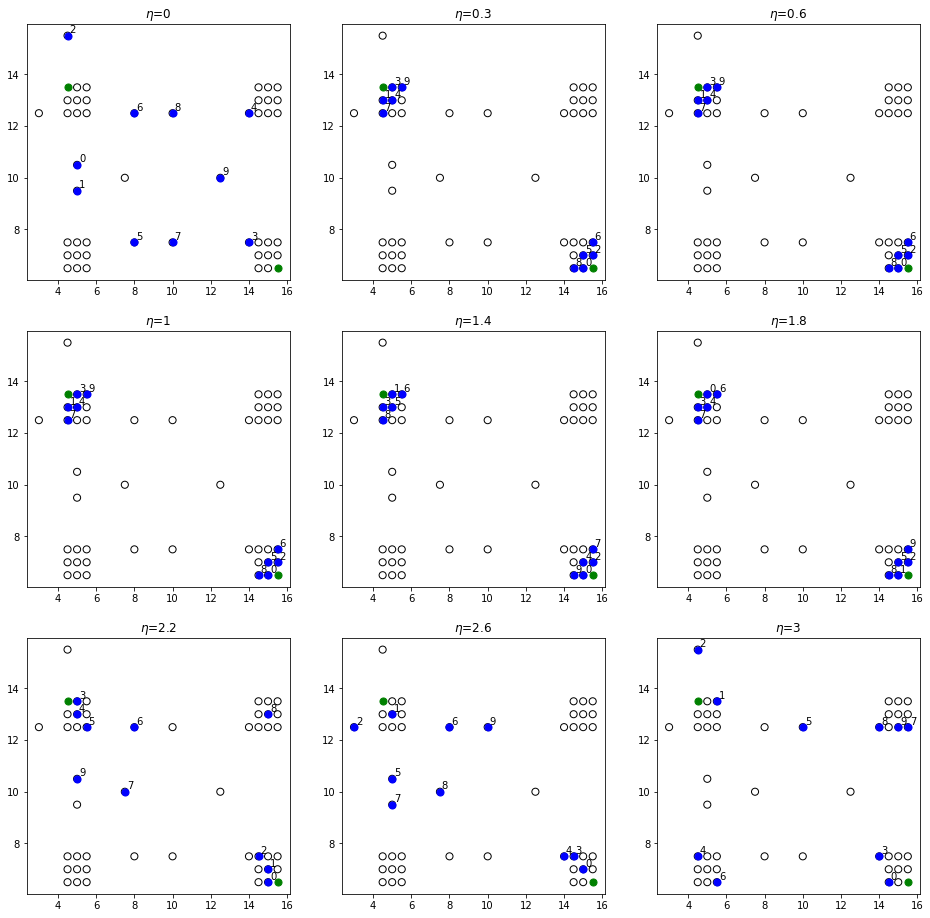

In [ ]:
from submodlib import LogDeterminantMutualInformationFunction
etas = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = LogDeterminantMutualInformationFunction(n=46, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData, 
                                                  metric="euclidean", magnificationEta=eta, lambdaVal=1)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Multiple Queries (2)

[(45, 0.0), (44, 0.0), (43, 0.0), (42, 0.0), (41, 0.0), (40, 0.0), (39, 0.0), (38, 0.0), (37, 0.0), (36, 0.0)]
[(1, 0.014), (6, 0.007), (17, 0.005), (16, 0.002), (7, 0.002), (15, 0.001), (2, 0.001), (12, 0.001), (43, 0.001), (23, 0.0)]
[(1, 0.056), (6, 0.028), (17, 0.02), (7, 0.008), (16, 0.008), (15, 0.004), (2, 0.003), (12, 0.003), (43, 0.002), (23, 0.002)]
[(1, 0.164), (6, 0.09), (17, 0.057), (7, 0.027), (16, 0.023), (2, 0.012), (15, 0.01), (12, 0.01), (43, 0.008), (0, 0.006)]
[(1, 0.353), (6, 0.227), (17, 0.116), (7, 0.075), (16, 0.048), (2, 0.033), (12, 0.03), (43, 0.024), (15, 0.022), (0, 0.018)]
[(1, 0.676), (6, 0.623), (7, 0.282), (17, 0.199), (2, 0.148), (12, 0.149), (43, 0.131), (0, 0.109), (16, 0.089), (8, 0.048)]
[(1, 1.324), (7, 1.918), (14, 2.351), (44, 0.676), (39, 0.938), (17, 0.339), (35, 0.199), (16, 0.174), (18, 0.147), (37, 0.095)]
[(7, 1.792), (0, 1.745), (45, 0.667), (39, 0.957), (17, 0.483), (16, 0.274), (44, 0.217), (35, 0.159), (15, 0.156), (36, 0.095)]
[(2, 1.

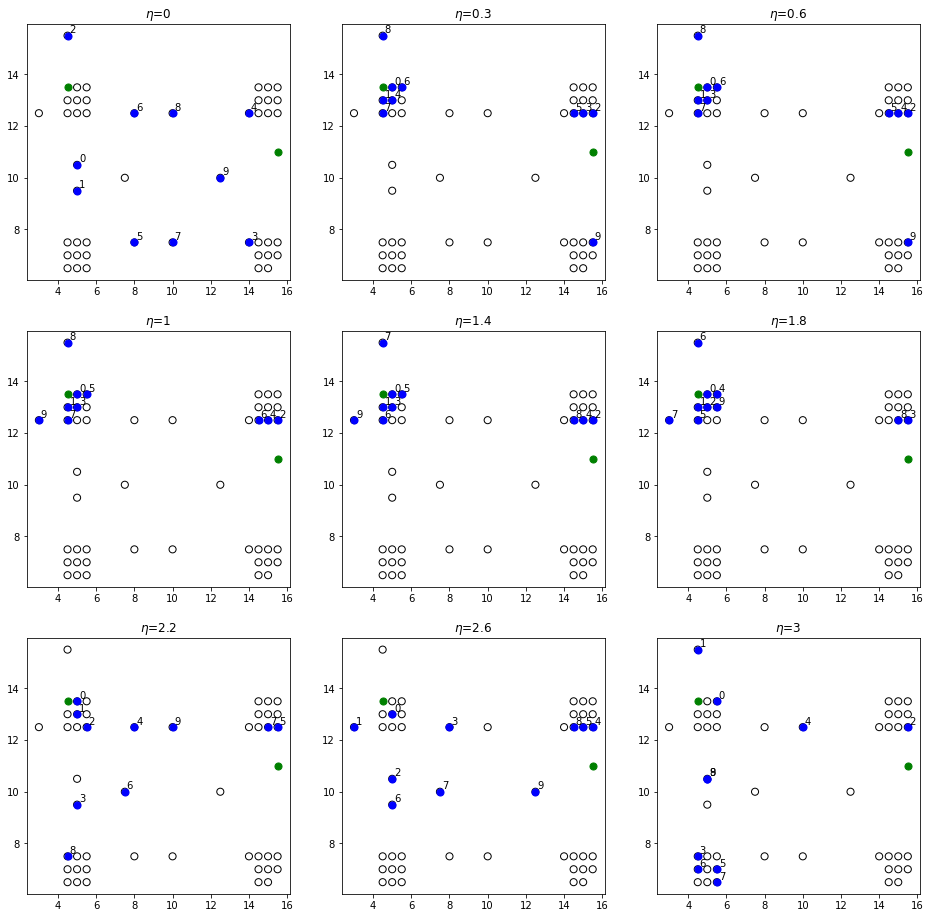

In [ ]:
from submodlib import LogDeterminantMutualInformationFunction
etas = [0, 0.3, 0.6, 1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = LogDeterminantMutualInformationFunction(n=46, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData2, 
                                                  metric="euclidean", magnificationEta=eta, lambdaVal=1)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    printGreedyRounded(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

# Selection by SetCover Mutual Information Function

In [ ]:
import numpy as np
import random
from submodlib import SetCoverMutualInformationFunction
num_concepts = 20
num_samples = 15
budget = 4
cover_set = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    cover_set.append(set(random.sample(list(range(num_concepts)), random.randint(0,num_concepts/2))))
    printable = ["\u25A1"]*num_concepts
    #print(''.join(map(str, temp)))
    for ind, val in enumerate(printable):
        if ind in cover_set[i]:
            printable[ind] = "\u25A0"
    #print(i, ": ", ''.join(map(str, printable)))
    printables.append(printable)
    #printable = ["\u25A0" if index in cover_set[i] for index, val in enumerate(temp)]
queries = set(random.sample(range(num_concepts),2))
print("Query set: ", queries)
obj = SetCoverMutualInformationFunction(n=num_samples, cover_set=cover_set, 
                                        num_concepts=num_concepts, query_concepts=queries)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})", "\u2713")
    else:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})")
print("Greedy Ordered List: ", greedyList)
greedyConcepts = set()
for elem in greedyIndices:
    greedyConcepts = greedyConcepts.union(cover_set[elem])
print("Concepts Covered by Greedy Set: ", greedyConcepts)
greedyPrintable = ["\u25A1"]*num_concepts
for ind, val in enumerate(greedyPrintable):
    if ind in greedyConcepts:
        greedyPrintable[ind] = "\u25A0"
print("Concepts Covered by Greedy Set: ", ''.join(map(str, greedyPrintable)))

Query set:  {0, 6}
0 :  □□■□□□□□□□□□□□□□□□■□ (2)
1 :  □□□■□□□□□□□□□□■■□□■□ (4)
2 :  ■□□■□□■□□■□□■■■■□□■■ (10)
3 :  □□□□□□□□□□□□□□□□□□□□ (0)
4 :  ■□□■□□□■■□■□□□■■□□□□ (7)
5 :  ■□□■□□■■■□□■■■□□□■■□ (10) ✓
6 :  □□□□□□□■□□□■■□□■■■■□ (7)
7 :  ■□□■□□□□□□□□□■□□□■□□ (4)
8 :  □□□■□□□□□■□□□□□□□□□□ (2)
9 :  □□□□□□■□□■□□□■□□■□□■ (5)
10 :  □□□□□□□□□□□□■□□■■□■□ (4)
11 :  □■■□□■□■■□■□■■□■□□□□ (9)
12 :  □□■■□■■□■□□■■□■□■□■□ (10) ✓
13 :  ■■■□□□□□□■■□■□□■□□□□ (7) ✓
14 :  □□□□□□□■□□□□□□□□■□□□ (2) ✓
Greedy Ordered List:  [(5, 2.0), (14, 0.0), (13, 0.0), (12, 0.0)]
Concepts Covered by Greedy Set:  {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
Concepts Covered by Greedy Set:  ■■■■□■■■■■■■■■■■■■■□


# Selection by ProbabilisticSetCover Mutual Information Function

In [ ]:
import numpy as np
import random
from submodlib import ProbabilisticSetCoverMutualInformationFunction
num_concepts = 10
num_samples = 10
budget = 4
probs = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    probs.append([round(num, 2) for num in np.random.rand(num_concepts).tolist()])
queries = set(random.sample(range(num_concepts),2))
print("Query concepts: ", queries)
obj = ProbabilisticSetCoverMutualInformationFunction(n=num_samples, probs=probs, 
                                                   num_concepts=num_concepts, query_concepts=queries)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", probs[i], "\u2713")
    else:
        print(i, ": ", probs[i])
print("Greedy Ordered List: ", greedyList)
greedyProbs = []
for i in range(num_concepts):
    product = 1
    for elem in greedyIndices:
        product = product * (1-probs[elem][i])
    greedyProbs.append(round(1-product, 2))
print("Probabilities of concepts covered by greedy set: ", greedyProbs)

Query concepts:  {1, 2}
0 :  [0.42, 0.72, 0.0, 0.3, 0.15, 0.09, 0.19, 0.35, 0.4, 0.54]
1 :  [0.42, 0.69, 0.2, 0.88, 0.03, 0.67, 0.42, 0.56, 0.14, 0.2]
2 :  [0.8, 0.97, 0.31, 0.69, 0.88, 0.89, 0.09, 0.04, 0.17, 0.88] ✓
3 :  [0.1, 0.42, 0.96, 0.53, 0.69, 0.32, 0.69, 0.83, 0.02, 0.75] ✓
4 :  [0.99, 0.75, 0.28, 0.79, 0.1, 0.45, 0.91, 0.29, 0.29, 0.13]
5 :  [0.02, 0.68, 0.21, 0.27, 0.49, 0.05, 0.57, 0.15, 0.59, 0.7]
6 :  [0.1, 0.41, 0.69, 0.41, 0.05, 0.54, 0.66, 0.51, 0.94, 0.59]
7 :  [0.9, 0.14, 0.14, 0.81, 0.4, 0.17, 0.93, 0.35, 0.75, 0.73]
8 :  [0.88, 0.62, 0.75, 0.35, 0.27, 0.9, 0.43, 0.96, 0.66, 0.62] ✓
9 :  [0.11, 0.95, 0.45, 0.58, 0.41, 0.24, 0.9, 0.57, 0.0, 0.62] ✓
Greedy Ordered List:  [(9, 1.399999976158142), (3, 0.5490000039935108), (2, 0.03495001347661105), (8, 0.011924405973064855)]
Probabilities of concepts covered by greedy set:  [0.98, 1.0, 1.0, 0.96, 0.98, 0.99, 0.98, 1.0, 0.72, 1.0]
